# Exploratory Data Analysis - Senior Center Client Data
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import geopandas as gpd
from senior_center_fy2020_data import sccd

In [3]:
sccd.columns

Index(['DFTA ID', 'Service Date', 'Total Daily Services',
       'Total Breakfasts Served', 'Total Lunches Served',
       'Total Dinners Served', 'Total Meals Served', 'Total AIB Services',
       'Total SCE Services', 'Total HPP Services', 'Total Clients Served',
       'Senior Center Name', 'Site Type', 'Borough', 'Meal Prep Type',
       'Meal Prep For Other Centers', 'Total Employees',
       'Client to Staff Ratio', 'PTE Status', 'Service Month',
       'Service Month as Num', 'Fiscal Quarter'],
      dtype='object')

In [4]:
# Get the sample size (n) for each grouping variable
for col in ['Service Month', 'Fiscal Quarter', 'Site Type', 'Borough', 'Meal Prep Type', 'Meal Prep For Other Centers', 'PTE Status']:
    print(f'{sccd.value_counts(col)}\n')

Service Month
July 2019         5963
August 2019       5921
October 2019      5797
January 2020      5772
December 2019     5641
September 2019    5384
March 2020        5355
February 2020     5240
November 2019     5198
June 2020         5159
April 2020        4383
May 2020          4361
dtype: int64

Fiscal Quarter
Q1    17268
Q2    16636
Q3    16367
Q4    13903
dtype: int64

Site Type
Neighborhood Senior Centers    59137
Innovative Senior Centers       4538
Senior Center                    499
dtype: int64

Borough
Brooklyn         21030
Manhattan        16857
Queens           12646
Bronx            11080
Staten Island     2561
dtype: int64

Meal Prep Type
Meal Prep On-Site    35504
Catered              23053
Both                  2971
Not Applicable        2646
dtype: int64

Meal Prep For Other Centers
No     53941
Yes    10233
dtype: int64

PTE Status
Has No PTEs    32992
Has PTEs       31182
dtype: int64



---
# Generating a quick-and-dirty correlation matrix to see what numerical variables might be related

In [5]:
numeric_cols = ['Total Daily Services', 'Total Breakfasts Served', 'Total Lunches Served',
       'Total Dinners Served', 'Total Meals Served', 'Total AIB Services',
       'Total SCE Services', 'Total HPP Services', 'Total Clients Served']

# Compute a correlation matrix and assign to corr_matrix
corr_matrix = sccd[numeric_cols].corr('pearson')

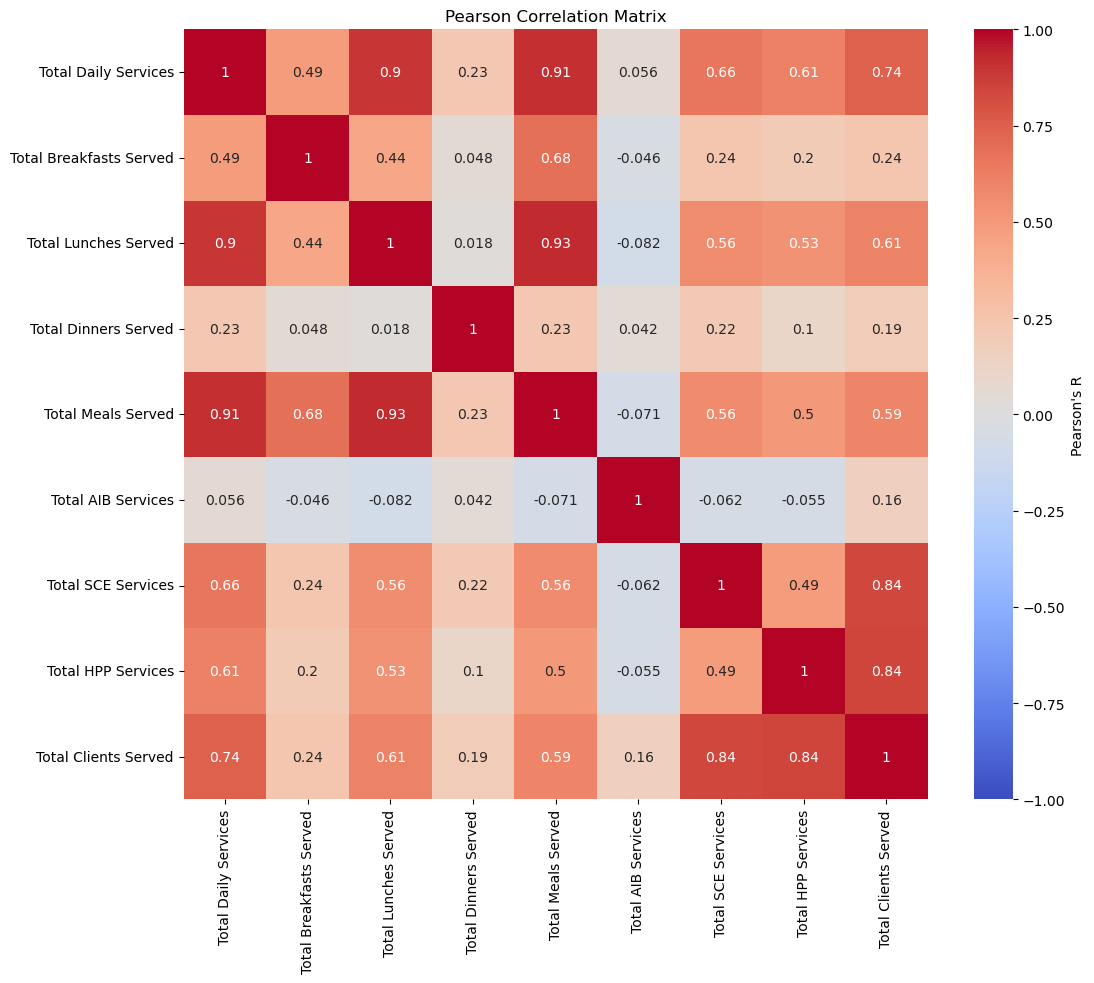

In [6]:
# Plot a heatmap from corr_matrix
plt.figure(figsize = (12, 10))

sns.heatmap(corr_matrix, vmin = -1.0, vmax = 1.0, annot = True, cmap = 'coolwarm',
            cbar_kws = {
                'label': 'Pearson\'s R',
                'orientation': 'vertical'
            }).set(title = 'Pearson Correlation Matrix')

plt.show()